<a href="https://colab.research.google.com/github/selcuk-yalcin/Information-Communication-Processing/blob/main/InfoMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load mixed signals and arrange them in a matrix of size (2, 92661),
# using the standard (rows, columns) notation.
def load_mixed_signals(file1, file2):

  #read wav files
  sample_rate, data1 = wavfile.read(file1)
  sample_rate, data2 = wavfile.read(file2)

  # Normalize both signal
  data1 = data1 / np.max(np.abs(data1))
  data2 = data2 / np.max(np.abs(data2))


  #Stack into shape (2, N)
  X = np.vstack((data1, data2))
  return X

file1 = '/content/drive/MyDrive/Colab Notebooks/info_com/Exercise_05-2/mix_ch1.wav'
file2 = '/content/drive/MyDrive/Colab Notebooks/info_com/Exercise_05-2/mix_ch2.wav'

X = load_mixed_signals(file1, file2)
# size of X
print(X.shape)

(2, 92661)


In [ ]:
# Initialize weight matrix W, e.g., randomly, as a 2x2 identity matrix
# or whatever you see fit
def initialize_weights(input_dim, output_dim):
    return np.random.randn(output_dim, input_dim)
W = initialize_weights(2, 2)

In [ ]:
#print(W)

In [ ]:
# Parameters
learning_rate    = 0.01
max_iterations   = 3800
entropy_history  = []
frobnorm_history = []

In [ ]:
# Infomax algorithm

def logistic(x):
    x = np.clip(x, -50, 50)
    return 1 / (1 + np.exp(-x))

def estimate_entropy(Y):
    Z = logistic(Y)
    return -np.mean(Z * np.log(Z ) + (1 - Z) * np.log(1 - Z ))

# loop over gradient update iterations
for i in range(max_iterations):
    # Compute estimate of separated signals by multiplying mixes X
    # with weight matrix W, resulting in a matrix Y of same size as X.
    Y = np.dot(W, X)
    # Pass Y through network non-linearity g, i.e., compute the
    #logistic function g(x)=1/(1+e^(-x)) for each element of matrix Y.
    Z = logistic(Y)
    # Compute the gradient delta W
    N = X.shape[1]  # number of samples
    dW = (np.eye(W.shape[0]) + ((1 - 2 * Z) @ Y.T) / N) @ W    # Update weight matrix W with a single update step
    W = W + learning_rate * dW

    # Calculate current entropy estimate
    entropy = estimate_entropy(Y)
    entropy_history.append(entropy)
    #append entropy to entropy_history
# Calculate current Frobenius norm
    frobnorm = np.linalg.norm(dW, ord='fro')
    frobnorm_history.append(frobnorm)
    if i % 100 == 0 or i == max_iterations - 1:
      print(f"Iter {i:4d} | Entropy: {entropy:.6f} | ‖ΔW‖: {frobnorm:.4f}")

Iter    0 | Entropy: 0.679360 | ‖ΔW‖: 2.7047
Iter  100 | Entropy: 0.641532 | ‖ΔW‖: 4.8057
Iter  200 | Entropy: 0.604619 | ‖ΔW‖: 10.2215
Iter  300 | Entropy: 0.593065 | ‖ΔW‖: 26.8132
Iter  400 | Entropy: 0.588052 | ‖ΔW‖: 66.6253
Iter  500 | Entropy: 0.565146 | ‖ΔW‖: 117.8321
Iter  600 | Entropy: 0.531222 | ‖ΔW‖: 95.4557
Iter  700 | Entropy: 0.513436 | ‖ΔW‖: 38.4782
Iter  800 | Entropy: 0.507859 | ‖ΔW‖: 14.8565
Iter  900 | Entropy: 0.506597 | ‖ΔW‖: 13.3794
Iter 1000 | Entropy: 0.506722 | ‖ΔW‖: 17.1873
Iter 1100 | Entropy: 0.507537 | ‖ΔW‖: 22.3244
Iter 1200 | Entropy: 0.509023 | ‖ΔW‖: 28.0362
Iter 1300 | Entropy: 0.511281 | ‖ΔW‖: 33.0866
Iter 1400 | Entropy: 0.514168 | ‖ΔW‖: 35.3805
Iter 1500 | Entropy: 0.517048 | ‖ΔW‖: 33.0668
Iter 1600 | Entropy: 0.519126 | ‖ΔW‖: 26.6787
Iter 1700 | Entropy: 0.520169 | ‖ΔW‖: 19.0987
Iter 1800 | Entropy: 0.520534 | ‖ΔW‖: 12.7293
Iter 1900 | Entropy: 0.520618 | ‖ΔW‖: 8.2037
Iter 2000 | Entropy: 0.520623 | ‖ΔW‖: 5.2111
Iter 2100 | Entropy: 0.520615 | ‖ΔW‖:

In [ ]:
# print entropy and Frobenius  norm after each iteration
print("Entropy history:", entropy_history)
print("Frobenius norm history:", frobnorm_history)


Entropy history: [np.float64(0.6793603363581401), np.float64(0.6791288497320926), np.float64(0.6788942122517424), np.float64(0.6786564045656195), np.float64(0.6784154079628973), np.float64(0.678171204398709), np.float64(0.6779237765195875), np.float64(0.6776731076890073), np.float64(0.6774191820129938), np.float64(0.6771619843657803), np.float64(0.6769015004154779), np.float64(0.6766377166497306), np.float64(0.6763706204013252), np.float64(0.6761001998737249), np.float64(0.675826444166491), np.float64(0.6755493433005626), np.float64(0.6752688882433601), np.float64(0.6749850709336735), np.float64(0.674697884306306), np.float64(0.6744073223164306), np.float64(0.6741133799636271), np.float64(0.6738160533155598), np.float64(0.6735153395312596), np.float64(0.6732112368839691), np.float64(0.6729037447835159), np.float64(0.6725928637981714), np.float64(0.672278595675959), np.float64(0.6719609433653692), np.float64(0.6716399110354453), np.float64(0.6713155040951975), np.float64(0.6709877292123

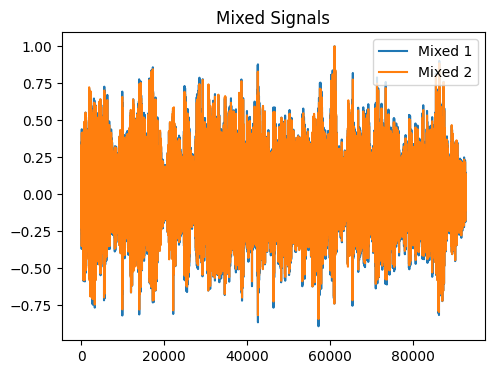

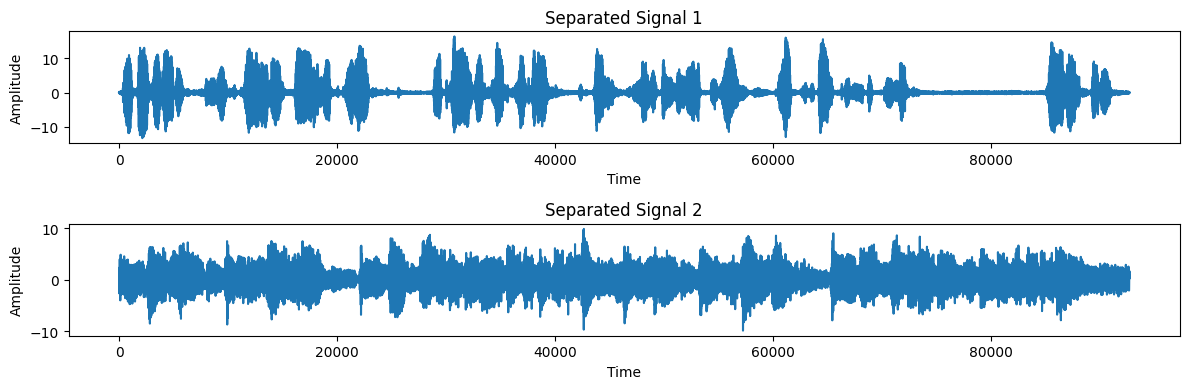

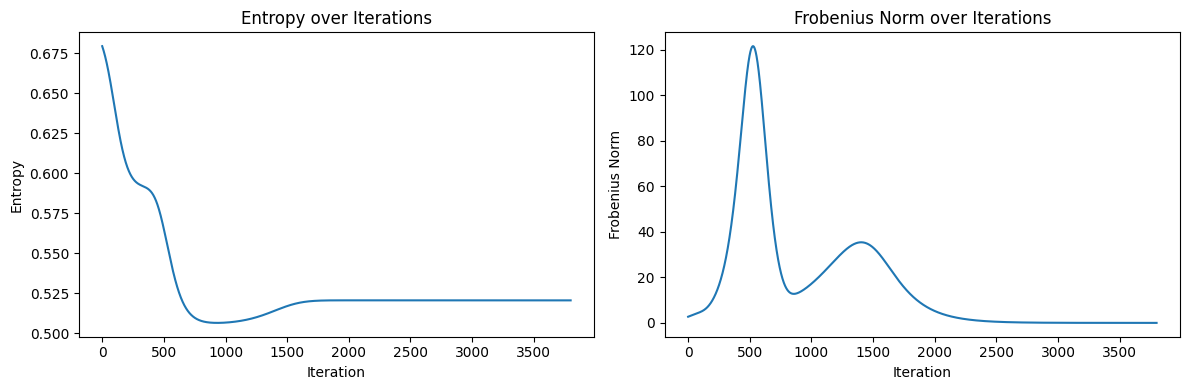

In [ ]:
# Perform evaluation
#plot mixed and separated signals
# Plot mixed signals (X)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(X[0], label="Mixed 1")
plt.plot(X[1], label="Mixed 2")
plt.title("Mixed Signals")
plt.legend()

plt.figure(figsize=(12, 4))

# Plot Separated Signal 1
plt.subplot(2, 1, 1)
plt.plot(Y[0])
plt.title("Separated Signal 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Plot Separated Signal 2
plt.subplot(2, 1, 2)
plt.plot(Y[1])
plt.title("Separated Signal 2")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


#plot entropy and frobnorm evolution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(entropy_history)
plt.title("Entropy over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Entropy")

plt.subplot(1, 2, 2)
plt.plot(frobnorm_history)
plt.title("Frobenius Norm over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Frobenius Norm")

plt.tight_layout()
plt.show()

#play separated signals

def normalize_audio(y):
    return y / np.max(np.abs(y))



In [ ]:
# Play first separated signal
Audio(normalize_audio(Y[0]), rate=8000 )


In [ ]:
# Play second one
Audio(normalize_audio(Y[1]), rate=8000 )

In [ ]:
#